# Assignment 2a Due 9/8

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [2]:
import matplotlib.pyplot as plt
import math 
import numpy as np
from scipy import integrate 

Now we can define our integration algorithms

In [23]:
def midpoint_rule(f,x0,xn,n_part):
    dx = (xn-x0)/float(n_part)
    area = 0
    for i in range (0,n_part):
        area += dx*f(x0 +i*dx)
    print(area)    
    return area

In [65]:
def trapezoidal_rule(f,x0,xn,n):
    h = (xn-x0)/(n-1)
    x = np.linspace(x0,xn,n)
    y = f(x)
    trapezoidal_sol = (h/2)*(y[0] + 2 * sum(y[1:n-1])+y[n-1])
    print(trapezoidal_sol)

In [57]:
def simpsons_rule(f,x0,xn,n):
    dx = (xn-x0)/n
    x = np.linspace(x0,xn,n+1)
    y = f(x)
    simpsons_sol = dx/3 * np.sum(y[0:-1:2]+ 4*y[1::2] + y[2::2])
    print(simpsons_sol)
    return simpsons_sol
    

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?
By testing your solution against known and expected values for simple integrals.

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where? Yes, This reminds me of the EM field integrals we had to do in electricity and magnetism. 

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [6]:
#exact solution to the integral
exact_solution =.3535533905932738

In [67]:
#solve the integral using your integration functions
my_midpoint_sol = midpoint_rule(lambda x: 2/((4+x**2)**(3/2)),0,2,6)
my_trapezoidal_sol = trapezoidal_rule(lambda x: 2/((4+x**2)**(3/2)),0,2,6)
my_simpsons_sol = simpsons_rule(lambda x: 2/((4+x**2)**(3/2)),0,2,6)

0.3798752218060784
0.35267026921866235
0.35355179062444925


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [72]:
#scipy integration
x0 = 0
xn = 2
n = 6
xs = np.linspace(x0,xn,n+1)
ys = 2/(4+xs**2)**(3/2)
dx = (xn-x0)/(n-1)
sci_trap_sol = integrate.trapz(ys,xs,dx)
print('exact scipy solution Trapazoidal:', sci_trap_sol)
sci_simp_sol = integrate.simps(ys,xs)
print('exact scipy solution Simpsons:', sci_simp_sol)

exact scipy solution Trapazoidal: 0.35293994641413146
exact scipy solution Simpsons: 0.35355179062444925


# Question
How do scipy integrals compare to yours? Support your answer. The trapezoidal scipy functions gives you a better result but still underestimates the just as my own algorithm does. However the simpsons rule algorithm I made came to the exact value as the scipy simpsons algorithm but they both overestimated the function.

In [74]:
#print the numerical values
my_midpoint_sol = midpoint_rule(lambda x: 2/((4+x**2)**(3/2)),0,2,6)
my_trapezoidal_sol = trapezoidal_rule(lambda x: 2/((4+x**2)**(3/2)),0,2,6)
my_simpsons_sol = simpsons_rule(lambda x: 2/((4+x**2)**(3/2)),0,2,6)
print('exact scipy solution Trapazoidal:', sci_trap_sol)
print('exact scipy solution Simpsons:', sci_simp_sol)
print("exact solution:",exact_solution)

0.3798752218060784
0.35267026921866235
0.35355179062444925
exact scipy solution Trapazoidal: 0.35293994641413146
exact scipy solution Simpsons: 0.35355179062444925
exact solution: 0.3535533905932738


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [78]:
#numerical comparisons
exact_trapezoidal_value = (.35267026921866235-exact_solution)/exact_solution
exact_simpsons_value = (.35355179062444925-exact_solution)/exact_solution
print("values compared to exact solution")
print(exact_trapezoidal_value)
print(exact_simpsons_value)

values compared to exact solution
-0.0024978444503941373
-4.525395222075483e-06


# Question
Which method provides the best approximation to the exact solution? The simpsons rule is giving the closest approximation.

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

Text(0, 0.5, 'Percent Difference')

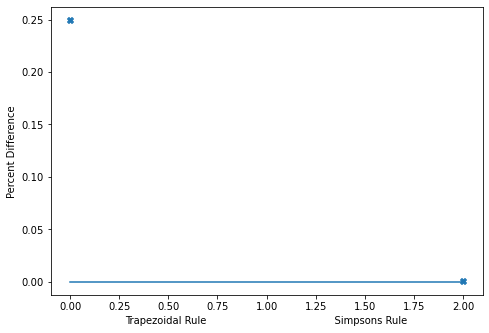

In [16]:
#plot
x = (0,2)
y = (.24978444503941373, .000452539522075483)
y_perf = (0,0)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,1.0,1.0])
ax.plot(x,y_perf, label='perfect approximation')
ax.scatter(x,y,marker='X')
ax.set_xlabel('Trapezoidal Rule                                         Simpsons Rule')
ax.set_ylabel('Percent Difference')

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [84]:
#solve integral above
sci_quad = integrate.quad(lambda x: math.e**(-x**2),-1000,1000)
print(sci_quad[0])

1.772453850905516


# Question
If you square your solution, does the resulting number have any special meaning? Of course, this solution is the square-root of pi. One of the most importent mathematical constants. 